In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# import tensorflow as tf
from six.moves import cPickle as pickle
import pickle
import os
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

In [ ]:
data = np.genfromtxt ('labelded_sss.csv', delimiter=",")
data = pd.DataFrame(data, columns=['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3', 'safe'])
data.shape

In [ ]:
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'safe'].values

In [ ]:
# X = data.ix[:, ['theta1', 'theta2', 'rate1', 'rate2']].values
# y = data.ix[:, 'safe'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01)
y_train[0:10]

In [ ]:
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

In [ ]:
# clf = KNeighborsClassifier(n_neighbors = 10)
# clf.fit(X_train_norm, y_train)
# clf.score(X_train_norm, y_train), clf.score(X_test_norm, y_test)

In [ ]:
forest = RandomForestClassifier(n_estimators = 15, n_jobs = -1, class_weight='balanced')
forest.fit(X_train, y_train)
importances = forest.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

forest.score(X_train, y_train), forest.score(X_test, y_test)

In [ ]:
scores = forest.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, scores, pos_label=1)
average_precision = average_precision_score(y_test, scores)

plt.figure()
plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
# plt.plot(threshold, precision[1:], label='area = %0.2f' % average_precision, color="red")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.grid(True)
len(precision), len(threshold), len(recall)

plt.figure()
# plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.plot(threshold, precision[1:], label='area = %0.2f' % average_precision, color="red")
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('threshold')
plt.ylabel('Precision')
plt.title('Threshold Precision Curve')
plt.legend(loc="lower right")

In [ ]:
forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
forest.fit(X_train_norm, y_train)
importances = forest.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

forest.score(X_train_norm, y_train), forest.score(X_test_norm, y_test)

In [ ]:
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train_norm, y_train)
importances = clf.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

clf.score(X_train_norm, y_train), clf.score(X_test_norm, y_test)

In [ ]:
X, y = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values, data.ix[:, ['safe']].values
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.95)

In [ ]:
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)
X_train_norm.shape

In [ ]:
clf = SVC(kernel='rbf', class_weight='balanced', C = 1., probability=True)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

In [ ]:
rbf_feature = RBFSampler()
X_train_features = rbf_feature.fit_transform(X_train)
X_test_features = rbf_feature.transform(X_test)
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)
X_train_norm.shape


In [ ]:
clf = SGDClassifier(n_jobs = -1, loss= 'perceptron', class_weight= 'balanced')  
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

In [81]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [ ]:
X, y = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values, data.ix[:, ['safe']].values
X = X.astype(np.float32)
y = y.astype(np.float32)
num_labels = 2
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=.1)
valid_dataset, test_dataset, valid_labels, test_labels = train_test_split(test_dataset, test_labels, test_size=.5)
train_labels = (np.arange(num_labels) == train_labels[:,None]).astype(np.float32)
valid_labels = (np.arange(num_labels) == valid_labels[:,None]).astype(np.float32)
test_labels = (np.arange(num_labels) == test_labels[:,None]).astype(np.float32)
train_labels = train_labels.reshape((train_labels.shape[0], train_labels.shape[2]))
valid_labels = valid_labels.reshape((valid_labels.shape[0], valid_labels.shape[2]))
test_labels = test_labels.reshape((test_labels.shape[0], test_labels.shape[2]))
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)


In [ ]:
batch_size = 128
hidden_layer1_size = 1024
hidden_layer2_size = 305
hidden_lastlayer_size = 75
data_size = 6
num_labels = 2

use_multilayers = True

regularization_meta=0.03


graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  keep_prob = tf.placeholder(tf.float32)

  weights_layer1 = tf.Variable(
    tf.truncated_normal([data_size, hidden_layer1_size], stddev=0.0517))
  biases_layer1 = tf.Variable(tf.zeros([hidden_layer1_size]))

  if use_multilayers:
    weights_layer2 = tf.Variable(
      tf.truncated_normal([hidden_layer1_size, hidden_layer1_size], stddev=0.0441))
    biases_layer2 = tf.Variable(tf.zeros([hidden_layer1_size]))

    weights_layer3 = tf.Variable(
      tf.truncated_normal([hidden_layer1_size, hidden_layer2_size], stddev=0.0441))
    biases_layer3 = tf.Variable(tf.zeros([hidden_layer2_size]))
    
    weights_layer4 = tf.Variable(
      tf.truncated_normal([hidden_layer2_size, hidden_lastlayer_size], stddev=0.0809))
    biases_layer4 = tf.Variable(tf.zeros([hidden_lastlayer_size]))


  weights = tf.Variable(
    tf.truncated_normal([hidden_lastlayer_size if use_multilayers else hidden_layer1_size, num_labels], stddev=0.1632))
  biases = tf.Variable(tf.zeros([num_labels]))
  
    
  # get the NN models
  def getNN4Layer(dSet, use_dropout):
    input_to_layer1 = tf.matmul(dSet, weights_layer1) + biases_layer1
    hidden_layer1_output = tf.nn.relu(input_to_layer1)
    
    
    logits_hidden1 = None
    if use_dropout:
       dropout_hidden1 = tf.nn.dropout(hidden_layer1_output, keep_prob)
       logits_hidden1 = tf.matmul(dropout_hidden1, weights_layer2) + biases_layer2
    else:
      logits_hidden1 = tf.matmul(hidden_layer1_output, weights_layer2) + biases_layer2
    
    hidden_layer2_output = tf.nn.relu(logits_hidden1)
    
    logits_hidden2 = None
    if use_dropout:
       dropout_hidden2 = tf.nn.dropout(hidden_layer2_output, keep_prob)
       logits_hidden2 = tf.matmul(dropout_hidden2, weights_layer3) + biases_layer3
    else:
      logits_hidden2 = tf.matmul(hidden_layer2_output, weights_layer3) + biases_layer3
    
    
    hidden_layer3_output = tf.nn.relu(logits_hidden2)
    logits_hidden3 = None
    if use_dropout:
       dropout_hidden3 = tf.nn.dropout(hidden_layer3_output, keep_prob)
       logits_hidden3 = tf.matmul(dropout_hidden3, weights_layer4) + biases_layer4
    else:
      logits_hidden3 = tf.matmul(hidden_layer3_output, weights_layer4) + biases_layer4
    
    
    hidden_layer4_output = tf.nn.relu(logits_hidden3)
    logits = None
    if use_dropout:
       dropout_hidden4 = tf.nn.dropout(hidden_layer4_output, keep_prob)
       logits = tf.matmul(dropout_hidden4, weights) + biases
    else:
      logits = tf.matmul(hidden_layer4_output, weights) + biases
    
    return logits

  # get the NN models
  def getNN1Layer(dSet, use_dropout, w1, b1, w, b):
    input_to_layer1 = tf.matmul(dSet, w1) + b1
    hidden_layer1_output = tf.nn.relu(input_to_layer1)
        
    logits = None
    if use_dropout:
       dropout_hidden1 = tf.nn.dropout(hidden_layer1_output, keep_prob)
       logits = tf.matmul(dropout_hidden1, w) + b
    else:
      logits = tf.matmul(hidden_layer1_output, w) + b
    
    return logits

  
  
  # Training computation.
  logits = getNN4Layer(tf_train_dataset, True)  
  logits_valid = getNN4Layer(tf_valid_dataset, False)
  logits_test = getNN4Layer(tf_test_dataset, False)
    
  
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  #loss_l2 = loss + (regularization_meta * (tf.nn.l2_loss(weights)))
  
  global_step = tf.Variable(0)  # count the number of steps taken.
  learning_rate = tf.train.exponential_decay(0.3, global_step, 3500, 0.86, staircase=True)
  
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(logits_valid)
  test_prediction = tf.nn.softmax(logits_test)



num_steps = 95001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in xrange(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob:0.75}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step", step, ":", l)
      print("Minibatch accuracy: %.1f%%" % accuracy(train_prediction.eval(feed_dict={tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob:1.0}), batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(feed_dict={keep_prob:1.0}), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(feed_dict={keep_prob:1.0}), test_labels))

In [ ]:
ls

In [30]:
data = np.genfromtxt ('../AutomaticScriptForSubRegions/Robot/subspaces.csv', delimiter=",")
data = pd.DataFrame(data, columns=['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3', 'level'])
data.shape

(1052838, 7)

In [22]:
# xtra_data = []
# for theta1 in np.arange(-0.1, 0.2, 0.05):
#     for theta2 in np.arange(-0.1, 0.2, 0.05):
#         for theta3 in np.arange(-0.1, 0.2, 0.05):
#             for rate1 in np.arange(-1, 2, 0.5):
#                 for rate2 in np.arange(-1, 2, 0.5):
#                     for rate3 in np.arange(-1, 2, 0.5):
#                         xtra_data.append([theta1, theta2, theta3, rate1, rate2, rate3, 0])

# data = np.concatenate((data, np.array(xtra_data)), axis=0)


In [29]:
# np.savetxt("../AutomaticScriptForSubRegions/Robot/subspaces.csv", data, delimiter=",")


In [79]:
X, y = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values, data.ix[:, ['level']].values
X = X.astype(np.float32)
y = y.astype(np.float32)
num_labels = 3
# y = label_binarize(y, classes=[0, 1])
# n_classes = y.shape[1]
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=.1)
valid_dataset, test_dataset, valid_labels, test_labels = train_test_split(test_dataset, test_labels, test_size=.5)
train_labels = (np.arange(num_labels) == train_labels[:,None]).astype(np.float32)
valid_labels = (np.arange(num_labels) == valid_labels[:,None]).astype(np.float32)
test_labels = (np.arange(num_labels) == test_labels[:,None]).astype(np.float32)
train_labels = train_labels.reshape((train_labels.shape[0], train_labels.shape[2]))
valid_labels = valid_labels.reshape((valid_labels.shape[0], valid_labels.shape[2]))
test_labels = test_labels.reshape((test_labels.shape[0], test_labels.shape[2]))
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (880875, 6), (880875, 3))
('Validation set', (48937, 6), (48937, 3))
('Test set', (48938, 6), (48938, 3))


In [82]:
batch_size = 128
hidden_layer1_size = 1024
hidden_layer2_size = 305
hidden_lastlayer_size = 75
data_size = 6

use_multilayers = True

regularization_meta=0.03


graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  keep_prob = tf.placeholder(tf.float32)

  weights_layer1 = tf.Variable(
    tf.truncated_normal([data_size, hidden_layer1_size], stddev=0.0517))
  biases_layer1 = tf.Variable(tf.zeros([hidden_layer1_size]))

  if use_multilayers:
    weights_layer2 = tf.Variable(
      tf.truncated_normal([hidden_layer1_size, hidden_layer1_size], stddev=0.0441))
    biases_layer2 = tf.Variable(tf.zeros([hidden_layer1_size]))

    weights_layer3 = tf.Variable(
      tf.truncated_normal([hidden_layer1_size, hidden_layer2_size], stddev=0.0441))
    biases_layer3 = tf.Variable(tf.zeros([hidden_layer2_size]))
    
    weights_layer4 = tf.Variable(
      tf.truncated_normal([hidden_layer2_size, hidden_lastlayer_size], stddev=0.0809))
    biases_layer4 = tf.Variable(tf.zeros([hidden_lastlayer_size]))


  weights = tf.Variable(
    tf.truncated_normal([hidden_lastlayer_size if use_multilayers else hidden_layer1_size, num_labels], stddev=0.1632))
  biases = tf.Variable(tf.zeros([num_labels]))
  
    
  # get the NN models
  def getNN4Layer(dSet, use_dropout):
    input_to_layer1 = tf.matmul(dSet, weights_layer1) + biases_layer1
    hidden_layer1_output = tf.nn.relu(input_to_layer1)
    
    
    logits_hidden1 = None
    if use_dropout:
       dropout_hidden1 = tf.nn.dropout(hidden_layer1_output, keep_prob)
       logits_hidden1 = tf.matmul(dropout_hidden1, weights_layer2) + biases_layer2
    else:
      logits_hidden1 = tf.matmul(hidden_layer1_output, weights_layer2) + biases_layer2
    
    hidden_layer2_output = tf.nn.relu(logits_hidden1)
    
    logits_hidden2 = None
    if use_dropout:
       dropout_hidden2 = tf.nn.dropout(hidden_layer2_output, keep_prob)
       logits_hidden2 = tf.matmul(dropout_hidden2, weights_layer3) + biases_layer3
    else:
      logits_hidden2 = tf.matmul(hidden_layer2_output, weights_layer3) + biases_layer3
    
    
    hidden_layer3_output = tf.nn.relu(logits_hidden2)
    logits_hidden3 = None
    if use_dropout:
       dropout_hidden3 = tf.nn.dropout(hidden_layer3_output, keep_prob)
       logits_hidden3 = tf.matmul(dropout_hidden3, weights_layer4) + biases_layer4
    else:
      logits_hidden3 = tf.matmul(hidden_layer3_output, weights_layer4) + biases_layer4
    
    
    hidden_layer4_output = tf.nn.relu(logits_hidden3)
    logits = None
    if use_dropout:
       dropout_hidden4 = tf.nn.dropout(hidden_layer4_output, keep_prob)
       logits = tf.matmul(dropout_hidden4, weights) + biases
    else:
      logits = tf.matmul(hidden_layer4_output, weights) + biases
    
    return logits

  # get the NN models
  def getNN1Layer(dSet, use_dropout, w1, b1, w, b):
    input_to_layer1 = tf.matmul(dSet, w1) + b1
    hidden_layer1_output = tf.nn.relu(input_to_layer1)
        
    logits = None
    if use_dropout:
       dropout_hidden1 = tf.nn.dropout(hidden_layer1_output, keep_prob)
       logits = tf.matmul(dropout_hidden1, w) + b
    else:
      logits = tf.matmul(hidden_layer1_output, w) + b
    
    return logits

  
  
  # Training computation.
  logits = getNN4Layer(tf_train_dataset, True)  
  logits_valid = getNN4Layer(tf_valid_dataset, False)
  logits_test = getNN4Layer(tf_test_dataset, False)
    
  
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  #loss_l2 = loss + (regularization_meta * (tf.nn.l2_loss(weights)))
  
  global_step = tf.Variable(0)  # count the number of steps taken.
  learning_rate = tf.train.exponential_decay(0.3, global_step, 3500, 0.86, staircase=True)
  
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(logits_valid)
  test_prediction = tf.nn.softmax(logits_test)



num_steps = 95001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in xrange(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob:0.75}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step", step, ":", l)
      print("Minibatch accuracy: %.1f%%" % accuracy(train_prediction.eval(feed_dict={tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob:1.0}), batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(feed_dict={keep_prob:1.0}), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(feed_dict={keep_prob:1.0}), test_labels))

Initialized
('Minibatch loss at step', 0, ':', 1.1226338)
Minibatch accuracy: 66.4%
Validation accuracy: 71.3%
('Minibatch loss at step', 500, ':', 0.13852669)
Minibatch accuracy: 98.4%
Validation accuracy: 95.2%
('Minibatch loss at step', 1000, ':', 0.21013364)
Minibatch accuracy: 99.2%
Validation accuracy: 95.7%
('Minibatch loss at step', 1500, ':', 0.12611952)
Minibatch accuracy: 99.2%
Validation accuracy: 95.9%
('Minibatch loss at step', 2000, ':', 0.037048079)
Minibatch accuracy: 100.0%
Validation accuracy: 97.1%
('Minibatch loss at step', 2500, ':', 0.088235386)
Minibatch accuracy: 98.4%
Validation accuracy: 97.3%
('Minibatch loss at step', 3000, ':', 0.088433363)
Minibatch accuracy: 98.4%
Validation accuracy: 97.2%
('Minibatch loss at step', 3500, ':', 0.082487665)
Minibatch accuracy: 99.2%
Validation accuracy: 97.0%
('Minibatch loss at step', 4000, ':', 0.019862831)
Minibatch accuracy: 100.0%
Validation accuracy: 98.7%
('Minibatch loss at step', 4500, ':', 0.05177163)
Minibatch

In [5]:
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
y_train[0:10]
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)



In [ ]:
import math, functools
p = [20, 10, 30]
functools.reduce(math.gcd, p)

bound = np.array([[80], [40], [30]])
u = np.array([[100], [40], [30]])
np.minimum(bound, u)

In [62]:
forest = RandomForestClassifier(n_estimators = 2, n_jobs = -1, class_weight='balanced')
forest.fit(X_train, y_train)
importances = forest.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

forest.score(X_train, y_train), forest.score(X_test, y_test)

('theta1', 0.48629832630424419)
('theta2', 0.14562975570584419)
('theta3', 0.062519674401128489)
('rate1', 0.17708399655037799)
('rate2', 0.082285571954176212)
('rate3', 0.046182675084229061)


(0.98303732084575002, 0.95321583652618136)

In [80]:
%%time
forest.predict(X_test[0, :].reshape(1, -1)), y_test[0]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 116 ms


(array([ 2.]), 2.0)

In [ ]:
# pickle.dump(forest, open(os.path.join('./', 'subspace_clf.pkl'), 'wb'))

In [ ]:
ls

In [ ]:
%%time
# clf = pickle.load(open(os.path.join('./', 'subspace_clf.pkl'), 'rb'))
forest.predict(np.array([[0,0,0,0,0,0]]))

In [ ]:
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
y_train[0:10]
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

forest = KNeighborsClassifier(n_neighbors=  10, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

forest.score(X_train, y_train), forest.score(X_test, y_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

clf = DecisionTreeClassifier(criterion = 'gini', max_depth = None, class_weight = 'balanced')
clf.fit(X_train, y_train)
importances = clf.feature_importances_
cols = data.columns
importances = zip(cols, importances)
for name, val in importances:
    print(name, val)

clf.score(X_train, y_train), clf.score(X_test, y_test)

theta1 0.346634028685
theta2 0.133626355006
theta3 0.0645949198916
rate1 0.289684103189
rate2 0.107899096466
rate3 0.0575614967627


(0.99926864326465825, 0.96944454997910412)

In [32]:
pickle.dump(clf, open(os.path.join('./Cyber/', 'subspace_clf_decision_tree.pkl'), 'wb'))

In [53]:
from sklearn.tree import DecisionTreeClassifier
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y_orig = data.ix[:, 'level'].values
y = label_binarize(y_orig, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

clf = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = None, class_weight = 'balanced'))
clf.fit(X_train, y_train)
# importances = clf.feature_importances_
# cols = data.columns
# importances = zip(cols, importances)
# for name, val in importances:
#     print(name, val)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.95723116219667947)

(array([ 0.14730013,  0.95743787,  1.        ]),
 array([ 1.        ,  0.94867171,  0.        ]))

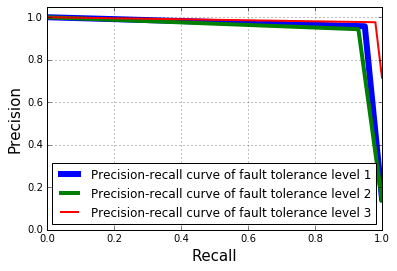

In [78]:
y_score = clf.predict_proba(X_test)


# Compute Precision-Recall and plot curve
n_classes = 3
prcsn = dict()
recall = dict()
average_precision = dict()
thrshld = {}
for i in range(n_classes):
    prcsn[i], recall[i], thrshld[i] = precision_recall_curve(y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# min_prcsn1 = 0.95  # let's do it for s1
# min_thrshld1=min([thrshld[0][i] for i in range(len(thrshld[0])) if prcsn[0][i]>=min_prcsn1])

# min_prcsn2 = 0.95  # let's do it for s2
# min_thrshld2=min([thrshld[1][i] for i in range(len(thrshld[1])) if prcsn[1][i]>=min_prcsn2])

# y_pred_adjusted=[1 if y_s[0]>min_thrshld1 else 2 if y_s[1] > min_thrshld2 else 3 for y_s in y_score]
# y_pred_adjusted = label_binarize(y_pred_adjusted, classes=[1, 2, 3])
# # y_pred_adjusted
# # np.array_equal(y_pred_adjusted, y_test)
# print('accuracy of adjusted y pred: ', 
#       sum([np.array_equal(y_pred_adjusted[i], y_test[i]) for i in np.arange(len(y_pred_adjusted))]) / len(y_pred_adjusted))
# # len(y_pred_adjusted), len(y_test), 

# Plot Precision-Recall curve for each class

plt.clf()
for i in range(n_classes):
    plt.plot(recall[i], prcsn[i], linewidth = 6 - 2*i,
             label='Precision-recall curve of fault tolerance level {0}'
                   ''.format(i+1))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize= 15)
plt.ylabel('Precision', fontsize= 15)

# plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.grid(True)


In [77]:
%%time
clf.predict(X_test[999, :].reshape(1, -1)), y_test[999]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.39 ms


(array([[0, 0, 1]]), array([0, 0, 1]))

In [ ]:
from sklearn.svm import SVC
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
y_train[0:10]
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

clf = SVC(C = 1., class_weight = 'balanced')
clf.fit(X_train[0:9001, :], y_train[0:9001])
# importances = clf.feature_importances_
# cols = data.columns
# importances = zip(cols, importances)
# for name, val in importances:
#     print(name, val)

clf.score(X_train_norm, y_train), clf.score(X_test_norm, y_test)

In [ ]:
%%time
clf.score(X_train_norm, y_train), clf.score(X_test_norm, y_test)

In [29]:
X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
y_train[0:10]
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

clf = SGDClassifier(n_jobs = -1, class_weight= 'balanced', penalty = 'l2', average = True, loss="log", 
                    alpha=1., n_iter=2, fit_intercept=True)  
clf.fit(X_train_norm, y_train)
clf.score(X_train_norm, y_train), clf.score(X_test_norm, y_test)

(0.7144101035901802, 0.71540229885057471)

In [28]:
len(X_train_norm)

880875

In [99]:
%%time
clf.predict(X_test[0, :].reshape(1, -1)), y_test[0]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 363 µs


(array([ 2.]), 2.0)

In [117]:
%%time
i = 1

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11 µs


962.828210115


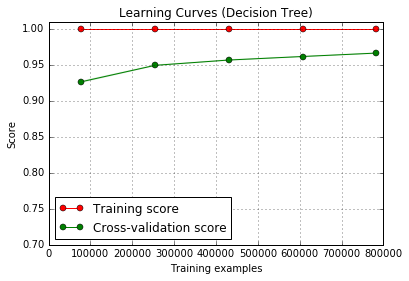

In [19]:
from sklearn import cross_validation

from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X = data.ix[:, ['theta1', 'theta2', 'theta3', 'rate1', 'rate2', 'rate3']].values
y = data.ix[:, 'level'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# X = X_train[0:200000, :]
# y = y_train[0:200000]


title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

import time
start = time.time()
estimator = DecisionTreeClassifier(class_weight = 'balanced')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print(time.time() - start)
# title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
#                                    test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
